In [ ]:
img_folder = '/content/drive/MyDrive/ecodata'

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_names = os.listdir(img_folder)
img_names

['Яблоня.jpg',
 'Вяз.jpg',
 'Берёза.jpg',
 'Липа.jpg',
 'Сирень обыкновенная.jpg',
 'Сирень венгерская.jpg']

In [ ]:
elm_img = cv2.imread(os.path.join(img_folder, img_names[1]))
apple_img_rgb = cv2.cvtColor(elm_img, cv2.COLOR_BGR2RGB)
apple_img_gray = cv2.cvtColor(elm_img, cv2.COLOR_BGR2GRAY)

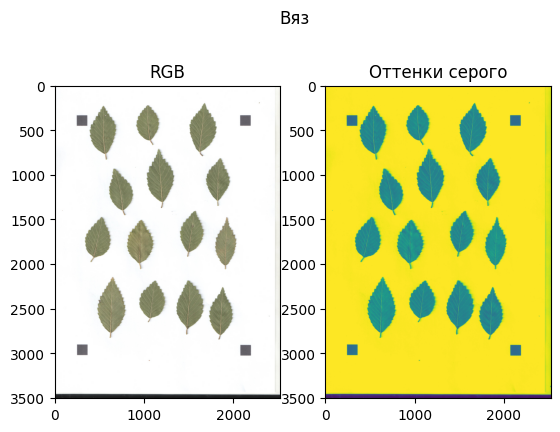

In [ ]:
figure, axes = plt.subplots(1, 2)
figure.suptitle(img_names[1].split('.')[0])
axes[0].set_title('RGB')
axes[0].imshow(apple_img_rgb)
axes[1].set_title('Оттенки серого')
axes[1].imshow(apple_img_gray)

In [ ]:
apple_img_rgb.

(3506, 2528, 3)

(array([5.641000e+04, 4.226000e+04, 6.938000e+03, 1.232840e+05,
        7.917050e+05, 3.588200e+05, 5.646900e+04, 4.079600e+04,
        8.194000e+04, 7.304546e+06]),
 array([ 15.,  39.,  63.,  87., 111., 135., 159., 183., 207., 231., 255.]),
 <BarContainer object of 10 artists>)

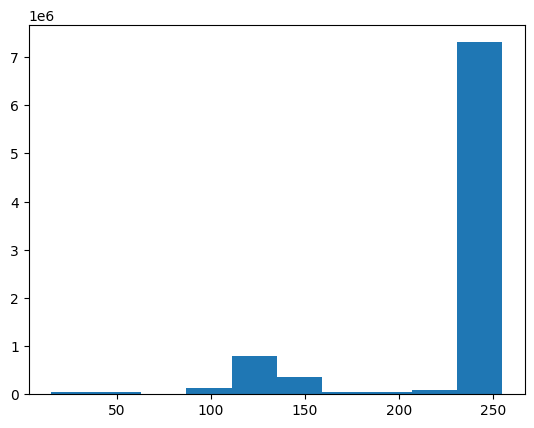

In [ ]:
tmp = apple_img_gray.reshape(-1)
plt.hist(tmp)

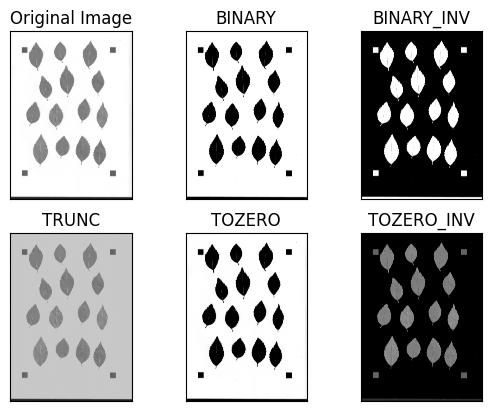

In [ ]:
ret,thresh1 = cv2.threshold(apple_img_gray,200,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(apple_img_gray,200,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(apple_img_gray,200,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(apple_img_gray,200,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(apple_img_gray,200,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [apple_img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Видим, что идеально подходи  

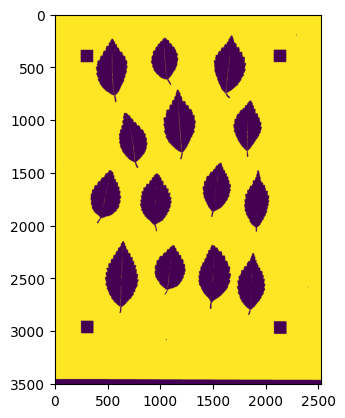

In [ ]:
plt.imshow(thresh1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
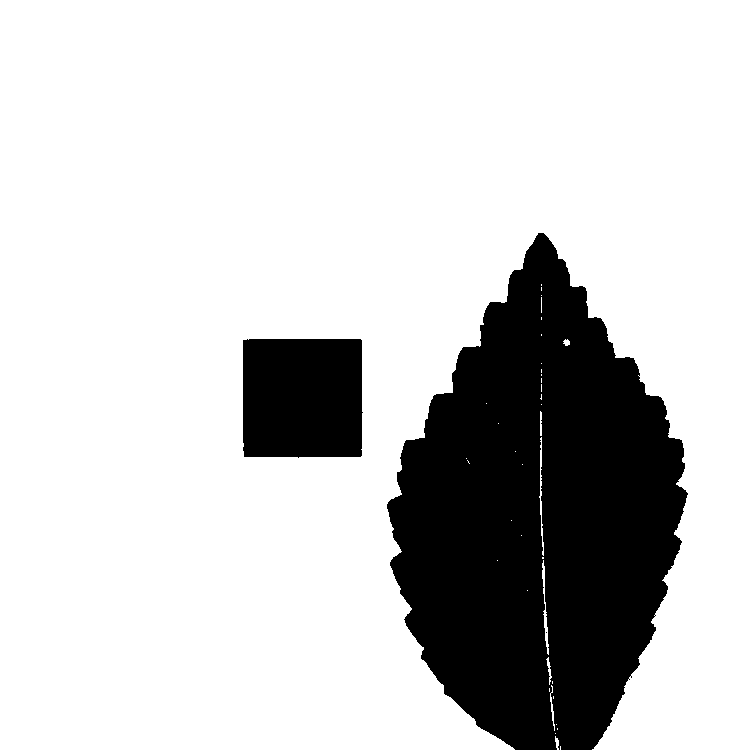

In [ ]:
thresh1[:750, :750]

In [ ]:
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
cp = thresh1.copy()

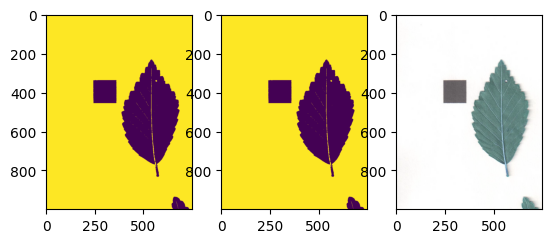

In [ ]:
figure, axes = plt.subplots(1, 3)
axes[0].imshow(cv2.drawContours(thresh1, contours, -1, (156,255,156), 5)[0:1000, 0:750])
axes[1].imshow(thresh1[0:1000, 0:750])
axes[2].imshow(elm_img[0:1000, 0:750])

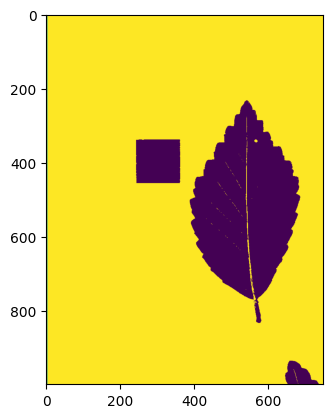

In [ ]:
plt.imshow(cv2.drawContours(thresh1, contours, -1, (156,255,156), 5)[0:1000, 0:750])
plt.imshow(thresh1[0:1000, 0:750])
plt.imshow(thresh1[0:1000, 0:750])

In [ ]:
len(contours)

1100

In [ ]:
#  cv2.connectedComponentsWithStats(thresh1, 4, cv2.CV_32S)

(1040,
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 array([[      0,      95,    2528,    3411, 1445978],
        [      0,       0,    2528,    3467, 7409516],
        [   1675,     207,       1,       1,       1],
        ...,
        [   1838,    2824,       1,       1,       1],
        [   1837,    2827,       1,       2,       2],
        [    616,    2828,       1,       1,       1]], dtype=int32),
 array([[1191.50705405, 1719.0003119 ],
        [1277.66888647, 1759.09810762],
        [1675.        ,  207.        ],
        ...,
        [1838.        , 2824.        ],
        [1837.        , 2827.5       ],
        [ 616.        , 2828.        ]]))